<a href="https://colab.research.google.com/github/Valeria4P/Clases-herramientas/blob/main/Minimos_Cuadrados_Valeria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Las variables de x son: [1.85 2.72 2.81 3.06 3.42 3.76 4.31 4.47 4.64 4.99]
Las variables de y son: [2.26 3.1  3.8  4.11 4.74 4.31 5.24 4.03 5.69 6.57]
El valor de m es: 1.109
El valor de b es: 0.389
El valor de la media es: 4.385
El valor de la varianza es: 0.359
La varianza es alta
El valor de la desviacion estandar es: 0.599
El valor del coeficiente de variacion es: 13.669


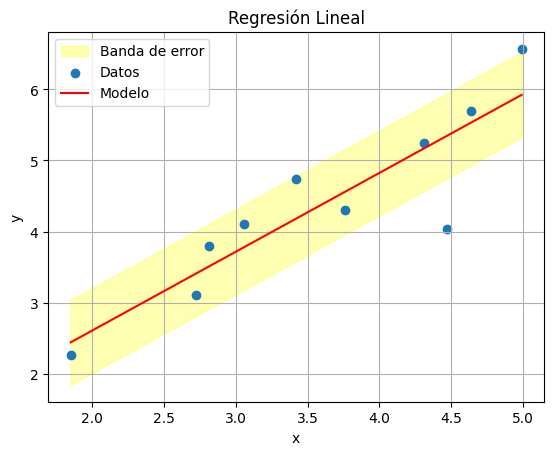

In [27]:
import pandas as pd
url = "https://raw.githubusercontent.com/mike1502/THC/main/Python/Aplicaciones/MinimosCuadrados/MinimosCuadrados.csv"
df = pd.read_csv(url)  # si usas ; como separador: pd.read_csv(url, delimiter=";")
x = df["x"].to_numpy()
y = df["y"].to_numpy()
print("Las variables de x son:", x)
print("Las variables de y son:", y)

#Gráficar m y b
import matplotlib.pyplot as plt
import numpy as np
n= len(x)
sum_x=np.sum(x)
sum_y=np.sum(y)
sum_xy=np.sum(x*y)
sum_x2=np.sum(x**2)
m=(n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b=(sum_y - m * sum_x) / n

print(f"El valor de m es: {m:.3f}")
print(f"El valor de b es: {b:.3f}")
y_model=m*x+b
x_line=np.linspace(min(x),max(x),100)
y_line=m*x_line+b

res=y-y_model
er=np.abs(res/y)*100 #error relativo
media=np.mean(y)
var=np.sum(res**2)/(n-2) #varianza
de=np.sqrt(var) #desviacion estandar
cv=de/media*100 #coeficiente de variacion, <0.5 baja varianza, >0.5 alta

print(f"El valor de la media es: {media:.3f}")
print(f"El valor de la varianza es: {var:.3f}")
if cv<0.5:
  print("La varianza es baja")
else:
  print("La varianza es alta")
print(f"El valor de la desviacion estandar es: {de:.3f}")
print(f"El valor del coeficiente de variacion es: {cv:.3f}")

lin_sup=y_line+de
lin_inf=y_line-de

plt.fill_between(x_line, lin_inf, lin_sup, color="yellow", alpha=0.3, label="Banda de error")

plt.scatter(x, y, label="Datos")
plt.plot(x, y_model, color="red", label="Modelo")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regresión Lineal")
plt.grid(True)
plt.show()


# Datos obtenidos de
# K.F. Riley, M. P. Hobson, S. J. Bence, 2006
# Mathematical Methods for Physics and Engineering.
# Cambridge University Press, 3rd Edition, 1363.

-0.005716456678518833 1.1491159490857963 [0.32413756]


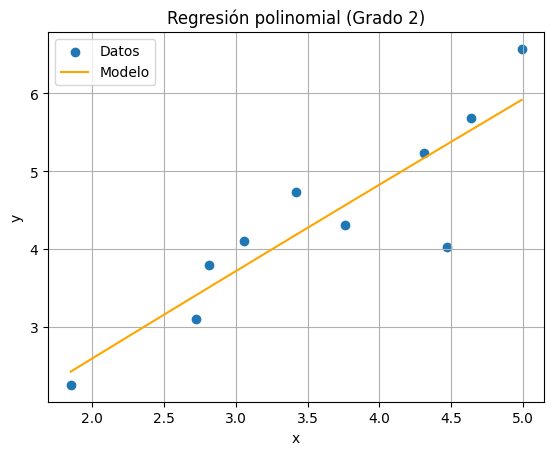

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


x=np.array([1.85, 2.72, 2.81, 3.06, 3.42, 3.76, 4.31, 4.47, 4.64, 4.99]).reshape(-1,1)
y=np.array([2.26, 3.1,  3.8,  4.11, 4.74, 4.31, 5.24, 4.03, 5.69, 6.57]).reshape(-1,1)

poly=PolynomialFeatures(degree=2, include_bias=True)
x_poly=poly.fit_transform(x)

model=LinearRegression()
model.fit(x_poly, y)

c=model.intercept_
a,b=model.coef_[0][2],model.coef_[0][1]
print(a,b,c)

x_fit=np.linspace(min(x),max(x),300).reshape(-1,1)
y_fit=poly.transform(x_fit)

y_final=model.predict(y_fit)


plt.scatter(x, y, label="Datos")
plt.plot(x_fit, y_final, color="orange", label="Modelo")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión polinomial (Grado 2)")
plt.legend()
plt.grid(True)
plt.show()

-3.5282439682829856 12.404347928894811 [-10.93506584]


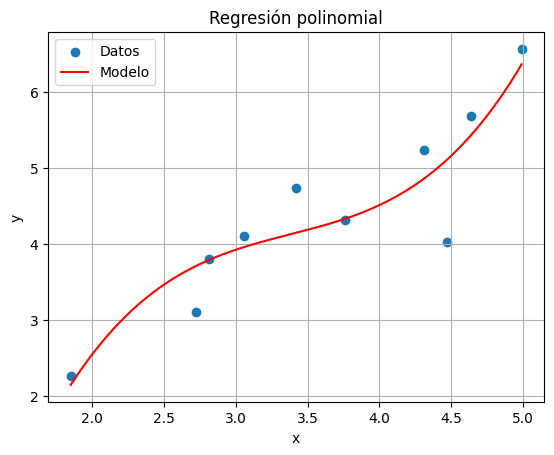

In [56]:
#con 3
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


x=np.array([1.85, 2.72, 2.81, 3.06, 3.42, 3.76, 4.31, 4.47, 4.64, 4.99]).reshape(-1,1)
y=np.array([2.26, 3.1,  3.8,  4.11, 4.74, 4.31, 5.24, 4.03, 5.69, 6.57]).reshape(-1,1)

poly=PolynomialFeatures(degree=3, include_bias=True)
x_poly=poly.fit_transform(x)

model=LinearRegression()
model.fit(x_poly, y)

c=model.intercept_
a,b=model.coef_[0][2],model.coef_[0][1]
print(a,b,c)

x_fit=np.linspace(min(x),max(x),300).reshape(-1,1)
y_fit=poly.transform(x_fit)

y_final=model.predict(y_fit)


plt.scatter(x, y, label="Datos")
plt.plot(x_fit, y_final, color="red", label="Modelo")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión polinomial (Grado 3)")
plt.legend()
plt.grid(True)
plt.show()